In [1]:

import torch
from datasets import load_dataset

# data = torch.load(path, map_location='cpu', weights_only=False)
# entropy_list = data['output_lst_entropy']
def load_data(idx):
    path = '/nfsdata/yhe/verl/analysis_data/train_1k_global_step_{}_generation.parquet'.format(str(idx))
    print(path)
    data = load_dataset('parquet', data_files=path)['train']
    return data


/nfsdata/yhe/miniconda3/envs/verl/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = '/nfsdata/yhe/verl/data/qwen-math/deepscaler/train_50.parquet'
data = load_dataset('parquet', data_files=path)['train']
data.features

Generating train split: 50 examples [00:00, 7521.53 examples/s]


{'data_source': Value('string'),
 'prompt': List({'content': Value('string'), 'role': Value('string')}),
 'ability': Value('string'),
 'reward_model': {'ground_truth': Value('string'), 'style': Value('string')},
 'extra_info': {'index': Value('int64'), 'split': Value('string')}}

In [4]:
data[1]['extra_info']['index']

1

In [12]:
a = [1,1,1,3,3,3,2,2,2,5,5,5,4,4,4]
import numpy as np
b = np.array(a)
c = [b[i] for i in range(0, len(b), 3)]
c


[1, 3, 2, 5, 4]

In [ ]:
val-core/math-verify-aime24/reward/mean@1:0.21 - 
val-aux/math-verify-aime24/score/mean@1:0.21 - 
val-core/math-verify-aime25/reward/mean@1:0.23666666666666666 - 
val-aux/math-verify-aime25/score/mean@1:0.23666666666666666 - 
val-core/math-verify-amc23/reward/mean@1:0.65 - 
val-aux/math-verify-amc23/score/mean@1:0.65 - 
val-core/math-verify-math500/reward/mean@1:0.826 - 
val-aux/math-verify-math500/score/mean@1:0.826 - 
val-core/math-verify-olympiadbench/reward/mean@1:0.46370370370370373 - 
val-aux/math-verify-olympiadbench/score/mean@1:0.46370370370370373 -

array([0, 1, 2])

In [15]:
(0.21+0.236+0.65+0.826+0.463)/5

0.47700000000000004

In [ ]:
val-aux/math-verify-aime24/score/mean@1:0.22666666666666666 - 
val-core/math-verify-aime25/reward/mean@1:0.23666666666666666 - 
val-aux/math-verify-aime25/score/mean@1:0.23666666666666666 - 
val-core/math-verify-amc23/reward/mean@1:0.7 - 
val-aux/math-verify-amc23/score/mean@1:0.7 - 
val-core/math-verify-math500/reward/mean@1:0.82 - 
val-aux/math-verify-math500/score/mean@1:0.82 - 
val-core/math-verify-olympiadbench/reward/mean@1:0.4918518518518519 - 
val-aux/math-verify-olympiadbench/score/mean@1:0.4918518518518519 


In [1]:
import numpy as np

a = ['a', 'ab', 'abc', 'abcd']
b = np.array(a, dtype=object)

In [3]:
c = b.reshape(2, 2)

In [4]:
c

array([['a', 'ab'],
       ['abc', 'abcd']], dtype=object)

In [ ]:
curl -I https://cursor.blob.core.windows.net/remote-releases/53b99ce608cba35127ae3a050c1738a959750860/vscode-reh-linux-x64.tar.gz

0.5008

In [ ]:
(0.497+0.832+0.725+0.22+0.23)/5
 
(0.236+0.203+0.482+0.824+0.6)/5

0.46900000000000003

In [26]:
compute_score(data_source, response_0, ground_truth_0, extra_info)

{'score': 1.0}

In [18]:
def add_reward_score(example):
    responses = example['responses']
    ground_truth = example['reward_model']['ground_truth']
    data_source = example['data_source']
    extra_info = example['extra_info']
    scores = []
    for response in responses:
        score = compute_score(data_source, response, ground_truth, extra_info)
        
        scores.append(float(score['score']))
    correct_ratio = sum(scores) / len(scores)
    example['correct_ratio'] = correct_ratio
    example['reward_scores'] = scores
    return example
# data_50 = load_data(50)
# data_100 = load_data(100)
# data_150 = load_data(150)


# data_50 = data_50.map(add_reward_score, num_proc=16)
# data_100 = data_100.map(add_reward_score, num_proc=16)
# data_150 = data_150.map(add_reward_score, num_proc=16)
# correct_ratio_50 = data_50['correct_ratio']
# correct_ratio_100 = data_100['correct_ratio']
# correct_ratio_150 = data_150['correct_ratio']


In [33]:
correct_ratio_50 = torch.tensor(correct_ratio_50, dtype=torch.float32)
correct_ratio_100 = torch.tensor(correct_ratio_100, dtype=torch.float32)
correct_ratio_150 = torch.tensor(correct_ratio_150, dtype=torch.float32)


In [37]:
delta_1 = correct_ratio_100 - correct_ratio_50
delta_2 = correct_ratio_150 - correct_ratio_100
delta_3 = correct_ratio_150 - correct_ratio_50


In [42]:
zero1 = delta_1 == 0
zero2 = delta_2 == 0
zero3 = delta_3 == 0
z1 = correct_ratio_50[zero1]
z2 = correct_ratio_100[zero2]
z3 = correct_ratio_150[zero3]

sum1 = (z1 == 0).sum()
sum2 = (z2 == 0).sum()
sum3 = (z3 == 0).sum()

print(sum1, sum2, sum3)


tensor(147) tensor(136) tensor(147)


In [44]:
sum4 = (z1 == 1).sum()
sum5 = (z2 == 1).sum()
sum6 = (z3 == 1).sum()

print(sum4, sum5, sum6)



tensor(243) tensor(277) tensor(251)


In [50]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

corr1 = pearsonr(correct_ratio_50, correct_ratio_100)
corr2 = pearsonr(correct_ratio_100, correct_ratio_150)
corr3 = pearsonr(correct_ratio_50, correct_ratio_150)

print(corr1, corr2, corr3)

corr1 = spearmanr(correct_ratio_50, correct_ratio_100)
corr2 = spearmanr(correct_ratio_100, correct_ratio_150)
corr3 = spearmanr(correct_ratio_50, correct_ratio_150)

print(corr1, corr2, corr3)




PearsonRResult(statistic=0.9619136, pvalue=0.0) PearsonRResult(statistic=0.96466833, pvalue=0.0) PearsonRResult(statistic=0.95189846, pvalue=0.0)
SignificanceResult(statistic=0.9322236752999666, pvalue=0.0) SignificanceResult(statistic=0.9310162577196393, pvalue=0.0) SignificanceResult(statistic=0.9193030914873906, pvalue=0.0)


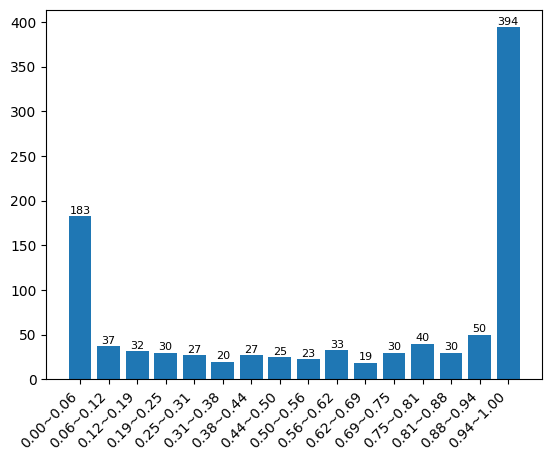

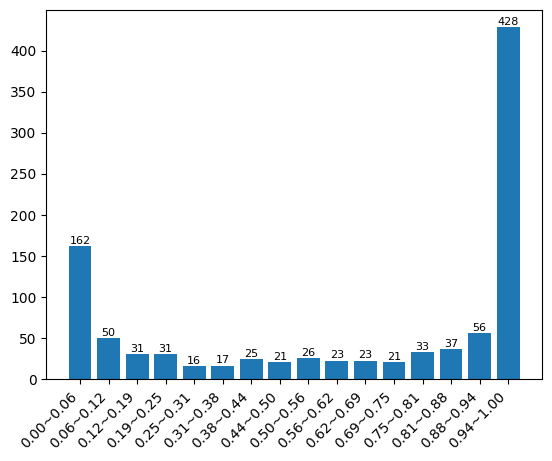

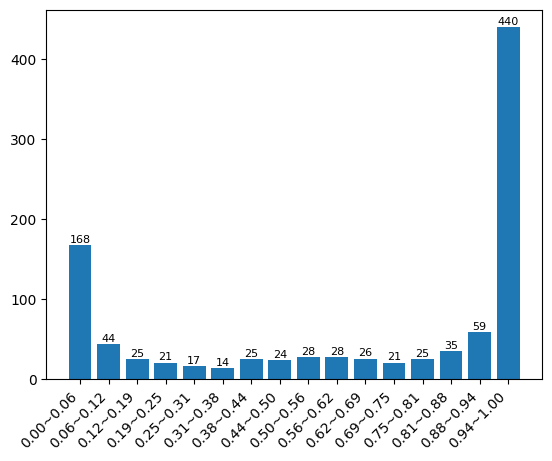

In [47]:
plot_hist(correct_ratio_50)
plot_hist(correct_ratio_100)
plot_hist(correct_ratio_150)


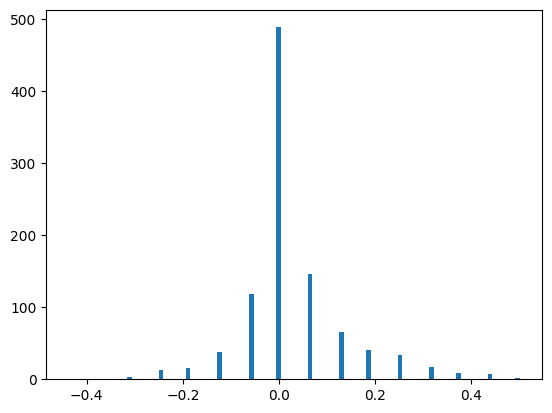

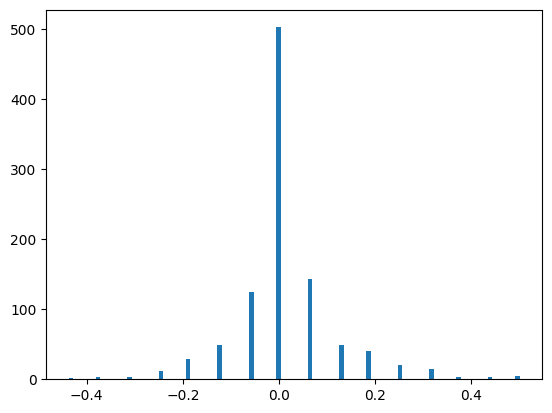

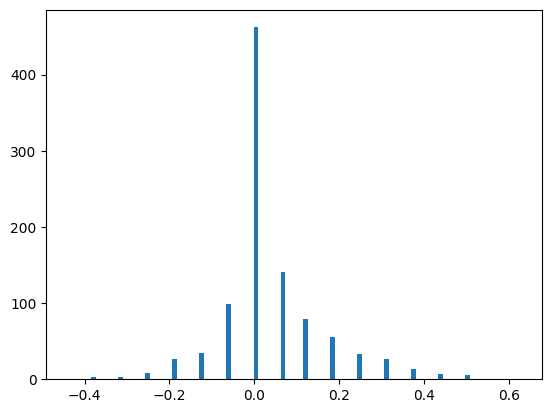

In [41]:

plt.hist(delta_1.numpy(), bins=100)

plt.show()
plt.hist(delta_2.numpy(), bins=100)

plt.show()
plt.hist(delta_3.numpy(), bins=100)


plt.show()




In [17]:
correct_ratio_2 = data['correct_ratio']

In [18]:
num_same = 0
for i in range(len(correct_ratio_2)):
    if correct_ratio_2[i] == correct_ratio[i]:
        num_same += 1

num_same



489

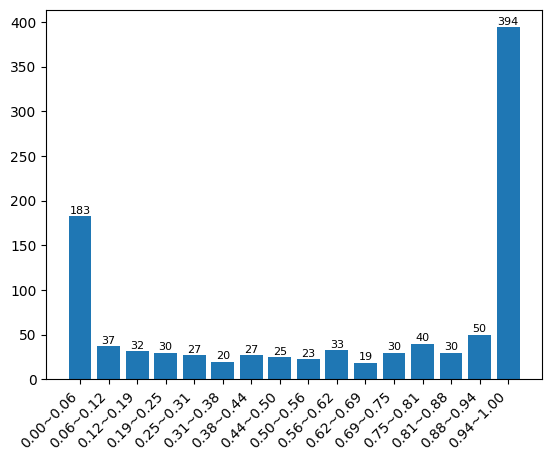

In [11]:
correct_ratio = data['correct_ratio']
import matplotlib.pyplot as plt
import numpy as np

# 只有16类，先统计每一类的数量
bins = np.linspace(0, 1, 17)  # 16个区间
counts, edges = np.histogram(correct_ratio, bins=bins)
x_labels = [f"{edges[i]:.2f}~{edges[i+1]:.2f}" for i in range(len(edges)-1)]

plt.bar(range(16), counts, tick_label=x_labels)

plt.xticks(rotation=45, ha='right')
for i, v in enumerate(counts):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=8)
plt.show()

In [45]:

def plot_hist(correct_ratio):
    import matplotlib.pyplot as plt
    import numpy as np

    # 只有16类，先统计每一类的数量
    bins = np.linspace(0, 1, 17)  # 16个区间
    counts, edges = np.histogram(correct_ratio, bins=bins)
    x_labels = [f"{edges[i]:.2f}~{edges[i+1]:.2f}" for i in range(len(edges)-1)]

    plt.bar(range(16), counts, tick_label=x_labels)

    plt.xticks(rotation=45, ha='right')
    for i, v in enumerate(counts):
        plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=8)
    plt.show()


In [7]:
num_half_correct = 0
for ratio in correct_ratio:
    if ratio >0 and ratio <= 0.625:
        num_half_correct += 1

num_half_correct / len(correct_ratio)



0.263

In [30]:
num_half_correct 

127

In [17]:
import os

VERIFICATION_REWARD_TYPE = os.environ.get("VERIFICATION_REWARD_TYPE", "baseline")
AUXILIARY_REWARDS = os.environ.get("AUXILIARY_REWARDS", "none")

print(f"Reward info: {VERIFICATION_REWARD_TYPE=} {AUXILIARY_REWARDS=}")

import re
try:
    from math_verify import parse, verify
    from math_verify.metric import math_metric
    from math_verify.parser import LatexExtractionConfig, ExprExtractionConfig
    from math_verify.errors import TimeoutException
except ImportError:
    print("To use Math-Verify, please install it first by running `pip install math-verify`.")

import logging

# Disable all loggers starting with 'math_verify'
for name, logger in logging.Logger.manager.loggerDict.items():
    if isinstance(logger, logging.Logger) and name.startswith("math_verify"):
        logger.disabled = True
        logger.handlers.clear()


def compute_score(data_source, solution_str, ground_truth, extra_info):
    if "</think>" in solution_str:
        solution_str = solution_str.split("</think>")[-1]
    split = extra_info.get("split", "train")
    if data_source.startswith("math-verify"):
        res = math_verify_reward(data_source, solution_str, ground_truth, extra_info)

    elif data_source == "qwen-math":
        res = qwen_math_reward(data_source, solution_str, ground_truth, extra_info)

    elif data_source.startswith("verification"):
        if split == "test":
            res = test_verification_reward(data_source, solution_str, ground_truth, extra_info)
        else:
            res = train_verification_reward(data_source, solution_str, ground_truth, extra_info)

    else:
        raise NotImplementedError(f"Reward function is not implemented for {data_source=}")

    return res


def math_verify_reward(data_source, solution_str, ground_truth, extra_info=None):
    try:
        pred = parse(solution_str)
        if "gsm8k" in data_source:
            gt = parse(ground_truth)
        else:
            gt = parse(f"${ground_truth}$")
        res = verify(gt, pred)
    except TimeoutException as e:
        res = False
    return dict(score=float(res))


def qwen_math_reward(data_source, solution_str, ground_truth, extra_info=None):
    reward = 0.0
    reward_dict = {}

    try:
        pred = parse(solution_str)
        gt = parse(f"${ground_truth}$")
        label = verify(gt, pred)
    except TimeoutException as e:
        label = False
    reward += float(label)

    if "no_code" in AUXILIARY_REWARDS:
        code_blocks = re.findall(r'```python[\s\S]*?```', solution_str)
        reward_dict["contain_code"] = len(code_blocks) > 0
        if reward_dict["contain_code"]:
            reward -= 0.5

    reward_dict["score"] = reward
    return reward_dict


def extract_yes_no(text: str) -> bool | None:
    """
    Search for 'Is the answer correct (Yes/No)? Yes|No' pattern in text and return True/False for Yes/No.
    Returns None if no match found, multiple matches found, or if the pattern is not at the end of the text.
    """
    pattern = r"Is the answer correct \(Yes/No\)\?\s+(Yes|No)"
    matches = re.findall(pattern, text)
    if len(matches) > 0:
        return matches[-1] == "Yes"
    else:
        return None


def train_verification_reward(data_source, solution_str, ground_truth, extra_info=None):
    reward = 0.0
    reward_dict = {}

    text = solution_str.strip().replace("**", "")
    label, correct_ratio = ground_truth.split("|")
    label, correct_ratio = eval(label), float(correct_ratio)
    
    output = extract_yes_no(text)
    reward_dict["valid_verification_form"] = output is not None
    
    if reward_dict["valid_verification_form"]:
        if VERIFICATION_REWARD_TYPE == "baseline":
            reward = label == output
        elif VERIFICATION_REWARD_TYPE == "fix_imbalance":
            if label == output:
                reward += float(output) * (1 - correct_ratio) + (1 - float(output)) * correct_ratio
                reward *= 2
        else:
            raise NotImplementedError(f"Reward function is not implemented for {VERIFICATION_REWARD_TYPE=}")

    if "non_short_response" in AUXILIARY_REWARDS:
        # penalty for short response
        reward_dict["non_short_response"] = len(solution_str) >= 40
        if not reward_dict["non_short_response"]:
            reward -= 0.5

    reward_dict["score"] = reward
    return reward_dict


def test_verification_reward(data_source, solution_str, ground_truth, extra_info=None):
    output = extract_yes_no(solution_str)
    label = eval(ground_truth)
    if output is None:
        res = False
    else:
        res = output == label
    return dict(score=float(res))


Reward info: VERIFICATION_REWARD_TYPE='baseline' AUXILIARY_REWARDS='none'


In [1]:
import torch

data_path = '/nfsdata/yhe/verl/checkpoints/baseline-verl-grpo/test-2k-no-entctl--DeepSeek-R1-Distill-Qwen-1.5B-deepscaler-NODE2/step2.pkl'
data = torch.load(data_path, map_location='cpu', weights_only=False)

RuntimeError: Invalid magic number; corrupt file?

In [ ]:
import torch
from datasets import load_dataset

def load_data(path):
    data = load_dataset('parquet', data_files=path)['train']
    return data

def load_pkl(path):
    data = torch.load(path, map_location='cpu', weights_only=False)
    return data


data_path = '/nfsdata/yhe/verl/analysis_data/train_generation.parquet'
data = load_data(data_path)
data[0]

In [ ]:
from verl import DataProto


In [78]:
tets_path = '/nfsdata/yhe/verl/checkpoints/baseline-verl-grpo/test-2k-no-entctl--DeepSeek-R1-Distill-Qwen-1.5B-deepscaler-NODE2/step2.pkl'
test_data = DataProto.load_from_disk(tets_path)


In [84]:
test_data.batch

TensorDict(
    fields={
        advantages: Tensor(shape=torch.Size([512]), device=cpu, dtype=torch.float32, is_shared=False),
        prompts: Tensor(shape=torch.Size([512, 2048]), device=cpu, dtype=torch.int64, is_shared=False),
        responses: Tensor(shape=torch.Size([512, 6144]), device=cpu, dtype=torch.int64, is_shared=False),
        returns: Tensor(shape=torch.Size([512, 6144]), device=cpu, dtype=torch.float32, is_shared=False),
        rollout_entropies: Tensor(shape=torch.Size([512, 6144]), device=cpu, dtype=torch.float32, is_shared=False),
        token_level_rewards: Tensor(shape=torch.Size([512]), device=cpu, dtype=torch.float32, is_shared=False)},
    batch_size=torch.Size([512]),
    device=None,
    is_shared=False)

In [81]:
entropy_test = test_data.batch['rollout_entropies']

In [83]:
entropy_test[:5, :10]

tensor([[6.8569e-01, 1.0653e-04, 9.1362e-01, 3.5269e-01, 1.5037e+00, 3.1297e-02,
         7.4015e-01, 7.9159e-01, 6.9873e-01, 2.5835e-03],
        [1.2846e+00, 5.6131e-03, 6.5408e-01, 1.6052e+00, 1.3309e-04, 1.3391e+00,
         2.2484e-01, 1.2808e+00, 1.5312e-02, 1.0455e-01],
        [7.3892e-01, 1.1156e-04, 3.9557e-01, 3.7453e-02, 1.0453e+00, 3.0106e-04,
         1.0562e+00, 9.9385e-02, 2.1468e-04, 5.8082e-01],
        [6.6938e-01, 1.6280e-05, 1.8664e-01, 1.9419e-02, 1.3991e+00, 3.7738e-02,
         6.5091e-02, 1.3535e-01, 5.2300e-03, 5.8199e-06],
        [6.8029e-01, 2.3835e-07, 3.6754e-01, 1.8651e-01, 1.5093e+00, 6.9068e-01,
         1.5437e-03, 6.9443e-01, 5.9238e-03, 6.1302e-01]])

In [75]:
test_entropy[:-10, :10]

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.3869, -0.5231,  0.0000,  ...,  0.0000,  0.0000, -0.6326],
        [-0.3869, -0.8981,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3869, -0.8981,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])

In [ ]:
pkl_path_logprobs = '/nfsdata/yhe/verl/analysis_data/train_generation_{}_log_probs.pkl'
pkl_path_entropy = '/nfsdata/yhe/verl/analysis_data/train_generation_{}_entropy.pkl'
total_log_probs = []
total_entropy = []
from tqdm import tqdm
for i in tqdm(range(158)):
    pkl_logprobs = load_pkl(pkl_path_logprobs.format(i))
    pkl_entropy = load_pkl(pkl_path_entropy.format(i))
    log_probs = pkl_logprobs['output_lst_log_probs']
    entropy = pkl_entropy['output_lst_entropy']
    length = torch.sum(log_probs != -1, dim=-1)
    log_probs = log_probs.masked_fill(log_probs == -1, 0)

    # entropy = entropy.masked_fill(entropy == -1, 0)
    log_probs = log_probs.sum(dim=-1) / length
    entropy = entropy.sum(dim=-1) / length
    total_log_probs.append(log_probs)
    total_entropy.append(entropy)

total_log_probs = torch.cat(total_log_probs, dim=0)
total_entropy = torch.cat(total_entropy, dim=0)



100%|██████████| 158/158 [00:16<00:00,  9.57it/s]


In [33]:
total_log_probs = total_log_probs.reshape(-1, 16)
total_entropy = total_entropy.reshape(-1, 16)

total_log_probs.shape
total_entropy.shape



torch.Size([40315, 16])

In [19]:
data = data.map(add_reward_score, num_proc=16)

Parameter 'function'=<function add_reward_score at 0x7fca041712d0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map (num_proc=16):   0%|          | 0/40315 [00:00<?, ? examples/s]

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fcc59669600>>
Traceback (most recent call last):
  File "/nfsdata/yhe/miniconda3/envs/verl/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 781, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
  File "/nfsdata/yhe/miniconda3/envs/verl/lib/python3.10/site-packages/math_verify/utils.py", line 44, in handler
    raise TimeoutException("Operation timed out!")
math_verify.errors.TimeoutException: Operation timed out!


In [28]:
correct_ratio = torch.tensor(correct_ratio, dtype=torch.float32)

In [30]:
torch.sum(correct_ratio==1)

tensor(9745)

In [34]:
log_probs_sample = total_log_probs[:, 0]
entropy_sample = total_entropy[:, 0]
log_probs_sample.shape

torch.Size([40315])

In [58]:
entropy_sample.shape

torch.Size([40315])

In [59]:
correct_ratio.shape

torch.Size([40315])

In [45]:
s_log_probs = torch.exp(log_probs_sample)
mu = torch.mean(s_log_probs)
scores = 1 - (s_log_probs - mu) ** 2







In [46]:
values, idx = torch.sort(scores, descending=True)
values[:10]






tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [47]:
values[-10:]

tensor([0.9788, 0.9786, 0.9778, 0.9773, 0.9754, 0.9752, 0.9746, 0.9727, 0.9715,
        0.9675])

In [56]:
type(target_data)

dict

In [57]:
idx_target = idx[:4000]
target_data = data[idx_target]
from datasets import Dataset
target_data = Dataset.from_dict(target_data)
target_data.to_parquet('/nfsdata/yhe/verl/data/qwen-math/deepscaler/train_generation_4k_ufo.parquet')

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

128076238

AttributeError: 'dict' object has no attribute 'to_parquet'

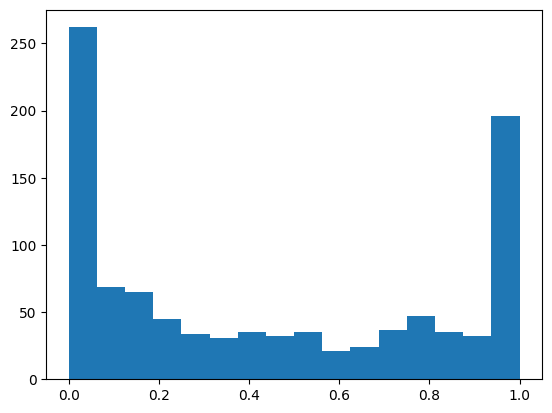

In [48]:
idx_1k = idx[:1000]
values_1k = values[:1000]
correct_ratio_1k = correct_ratio[idx_1k]
import matplotlib.pyplot as plt
plt.hist(correct_ratio_1k.numpy(), bins=16)
plt.show()





In [50]:
torch.sum(correct_ratio_1k==1) 

tensor(147)

In [51]:
values_1k = 1 - torch.abs(values_1k - 0.5)

In [52]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

corr1 = pearsonr(correct_ratio_1k, values_1k)
corr1

PearsonRResult(statistic=0.00018911809, pvalue=0.9952342963871487)

In [60]:
corr_entropy = pearsonr(correct_ratio, entropy_sample)
corr_entropy

PearsonRResult(statistic=nan, pvalue=nan)

In [63]:
entropy_sample.shape

torch.Size([40315])

In [64]:
entropy_sample[:10]

tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [44]:
correct_ratio_1k.mean()

tensor(0.2288)